### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/nishithpatel/datasets/refs/heads/main/lecture_datasets/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

*Summary of findings:*
- *Missing Values:*
  - *Missing values is limited to columns: car, Bar, CoffeeHouse, CarryAway, RestaurantLessThan20 and Restaurant20To50*
  - *Missing values for column car: 99% (12,576).  This means that car column is not useful and can be excluded from our analysis.*
  - *12079 rows i.e. 95% rows remain even after we drop rows with missing values in one of the following columns: Bar, CoffeeHouse, CarryAway, RestaurantLessThan20 and Restaurant20To50*
- *Column 'age' has the following values: below21, 21, 26, 31, 36, 41, 46, 50plus  which can be confusing unless you have the context that they represent ranges.*
  - *Thus updating them to: 20 and below, 21 to 25, 26 to 30, 31 to 35, 36 to 40, 41 to 45, 46 to 50 and 51 and above.*
- *Column 'passanger' is misspelled.*
  - *Column name updated to 'passenger'*


In [4]:
# Inspect data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [5]:
# Update pandas options to make sure the notebook shows all columns in data
pd.options.display.max_columns = 30 # we only have 26 columns but setting to 30 just in case we add more columns later

In [6]:
# descriptive statistics for numeric columns 
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# descriptive statistics for non-numeric fields
data.describe(include='O')

,destination,passanger,weather,time,coupon,expiration,gender,age,maritalStatus,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
count,12684,12684,12684,12684,12684,12684,12684,12684,12684,12684,12684,12684,108,12577,12467,12533,12554,12495
unique,3,4,3,5,5,2,2,8,5,6,25,9,5,5,5,5,5,5
top,No Urgent Place,Alone,Sunny,6PM,Coffee House,1d,Female,21,Married partner,Some college - no degree,Unemployed,$25000 - $37499,Scooter and motorcycle,never,less1,1~3,1~3,less1
freq,6283,7305,10069,3230,3996,7091,6511,2653,5100,4351,1870,2013,22,5197,3385,4672,5376,6077


In [8]:
# Number of rows with missing values per column 
data.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [9]:
# use normalize to check % of rows where car column value is missing
data.car.value_counts(dropna=False, normalize=True)

car
NaN                                         0.991485
Scooter and motorcycle                      0.001734
Mazda5                                      0.001734
do not drive                                0.001734
crossover                                   0.001656
Car that is too old to install Onstar :D    0.001656
Name: proportion, dtype: float64

In [10]:
# check value counts for Bar to see if NaN should be replaced with a different value 
data.Bar.value_counts(dropna=False, normalize=False)

Bar
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
NaN       107
Name: count, dtype: int64

In [11]:
# check value counts for CoffeeHouse to see if NaN should be replaced with a different value 
data.CoffeeHouse.value_counts(dropna=False, normalize=False)

CoffeeHouse
less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
NaN       217
Name: count, dtype: int64

In [12]:
# check value counts for CarryAway to see if NaN should be replaced with a different value 
data.CarryAway.value_counts(dropna=False, normalize=False)

CarryAway
1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
NaN       151
Name: count, dtype: int64

In [13]:
# check value counts for RestaurantLessThan20 to see if NaN should be replaced with a different value 
data.RestaurantLessThan20.value_counts(dropna=False, normalize=False)

RestaurantLessThan20
1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
NaN       130
Name: count, dtype: int64

In [14]:
# check value counts for Restaurant20To50 to see if NaN should be replaced with a different value 
data.Restaurant20To50.value_counts(dropna=False, normalize=False)

Restaurant20To50
less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
NaN       189
Name: count, dtype: int64

In [15]:
# check number of rows if we drop rows with null values for exactly 1 column; using thresh=25 since the dataframe has 26 columns in total 
data.dropna(axis=0, thresh=25).shape[0]

12079

In [16]:
# drop car column since value is missing in 99% of rows 
data_without_car = data.loc[:, 
         ['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus', 'has_children', 'education', 'occupation'
          , 'income', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same'
          , 'direction_opp', 'Y']
    ].copy()
data_without_car.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,0,0,1,0


In [17]:
# spot check data with missing values after removing car column
data_with_missing_values = data_without_car.loc[data_without_car.isna().any(axis=1)].copy()
data_with_missing_values

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12409,Home,Alone,Sunny,80,6PM,Restaurant(20-50),1d,Female,36,Married partner,1,Bachelors degree,Education&Training&Library,$37500 - $49999,less1,NaN,1~3,1~3,1~3,1,0,0,1,0,1
12410,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Female,36,Married partner,1,Bachelors degree,Education&Training&Library,$37500 - $49999,less1,NaN,1~3,1~3,1~3,1,0,0,0,1,1
12411,Work,Alone,Snowy,30,7AM,Coffee House,1d,Female,36,Married partner,1,Bachelors degree,Education&Training&Library,$37500 - $49999,less1,NaN,1~3,1~3,1~3,1,0,0,1,0,0
12412,Work,Alone,Snowy,30,7AM,Bar,1d,Female,36,Married partner,1,Bachelors degree,Education&Training&Library,$37500 - $49999,less1,NaN,1~3,1~3,1~3,1,1,1,0,1,0


Columns that require further inspection: temperature, expiration, age, has_children, toCoupon_GEQ5min, toCoupon_GEQ15min, toCoupon_GEQ25min, direction_same, direction_opp, Y 

In [18]:
data_without_car.temperature.value_counts()

temperature
80    6528
55    3840
30    2316
Name: count, dtype: int64

In [19]:
data_without_car.expiration.value_counts()

expiration
1d    7091
2h    5593
Name: count, dtype: int64

In [20]:
data_without_car.age.value_counts()

age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: count, dtype: int64

In [21]:
data_without_car.has_children.value_counts()

has_children
0    7431
1    5253
Name: count, dtype: int64

In [22]:
data_without_car.toCoupon_GEQ5min.value_counts()

toCoupon_GEQ5min
1    12684
Name: count, dtype: int64

In [23]:
data_without_car.toCoupon_GEQ15min.value_counts()

toCoupon_GEQ15min
1    7122
0    5562
Name: count, dtype: int64

In [24]:
data_without_car.toCoupon_GEQ25min.value_counts()

toCoupon_GEQ25min
0    11173
1     1511
Name: count, dtype: int64

In [25]:
data_without_car.direction_same.value_counts()

direction_same
0    9960
1    2724
Name: count, dtype: int64

In [26]:
data_without_car.direction_opp.value_counts()

direction_opp
1    9960
0    2724
Name: count, dtype: int64

In [27]:
data_without_car.Y.value_counts()

Y
1    7210
0    5474
Name: count, dtype: int64

In [28]:
data_without_car.income.value_counts()

income
$25000 - $37499     2013
$12500 - $24999     1831
$37500 - $49999     1805
$100000 or More     1736
$50000 - $62499     1659
Less than $12500    1042
$87500 - $99999      895
$75000 - $87499      857
$62500 - $74999      846
Name: count, dtype: int64

In [29]:
# get a list of column labels
print(data.columns.to_list())

['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus', 'has_children', 'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y']


3. Decide what to do about your missing data -- drop, replace, other...

In [30]:
# drop column car since it is missing values for 99% of the rows 
data = data.loc[:, 
         ['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus', 'has_children', 'education', 'occupation'
          , 'income', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same'
          , 'direction_opp', 'Y']
    ]
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,0,0,1,0


In [31]:
# drop rows with missing values for at least 1 of the remaining columns 
data = data.dropna(ignore_index=True)
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,0


In [32]:
# verify there are no more rows with missing values 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12079 entries, 0 to 12078
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-null

In [33]:
# verify there are no more rows with missing values 
data.loc[data.isna().any(axis=1)]

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y


In [34]:
# Column 'age' has the following values: below21, 21, 26, 31, 36, 41, 46, 50plus  which can be confusing unless you have the context that they represent ranges.  
#     Thus updating them to: 20 and below, 21 to 25, 26 to 30, 31 to 35, 36 to 40, 41 to 45, 46 to 50 and 51 and above. 
age_replacements = { 'below21':'20 and below', '21':'21 to 25', '26':'26 to 30', '31':'31 to 35', '36':'36 to 40', '41':'41 to 45', '46':'46 to 50', '50plus':'51 and above' }
data['age'] = data['age'].replace(age_replacements)
data.age 

0        21 to 25
1        21 to 25
2        21 to 25
3        21 to 25
4        21 to 25
           ...   
12074    26 to 30
12075    26 to 30
12076    26 to 30
12077    26 to 30
12078    26 to 30
Name: age, Length: 12079, dtype: object

In [35]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21 to 25,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21 to 25,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21 to 25,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21 to 25,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21 to 25,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,0


In [36]:
# Column name 'passanger' has been misspelled.  Update column name to fix this
data.rename( columns={'passanger':'passenger'}, inplace=True )
data.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21 to 25,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21 to 25,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21 to 25,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21 to 25,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21 to 25,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,0


4. What proportion of the total observations chose to accept the coupon?



*Summary of Findings:*
- *56.93% of total observations chose to accept the coupon*

In [37]:
# accept the coupon means Y = 1
round(data.Y.value_counts(normalize=True)*100,2)[1]

# 56.93% of total observations chose to accept the coupon

np.float64(56.93)

5. Use a bar plot to visualize the `coupon` column.

Text(0, 0.5, 'Coupon Count (Frequency)')

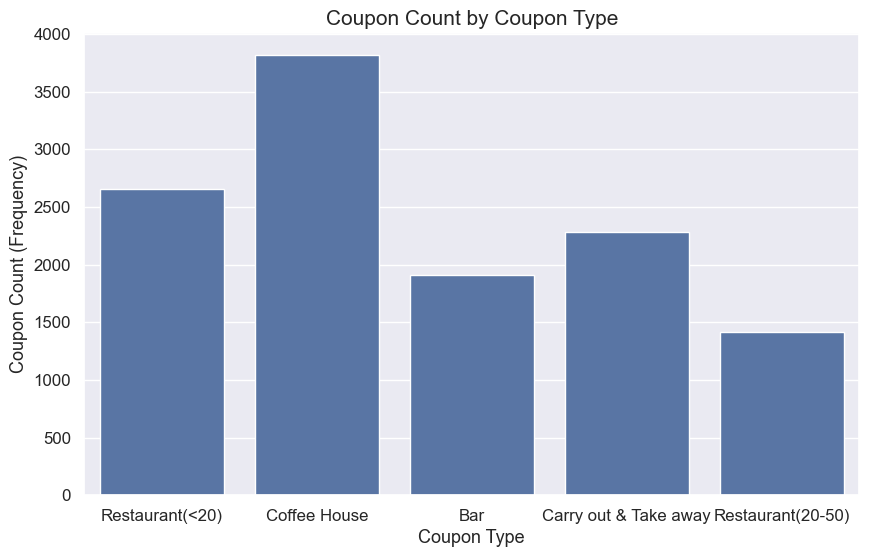

In [38]:
# Countplot aka histogram showing # of observations by coupon 
plt.figure(figsize=(10,6))
sns.set_theme(
    font_scale=1.1
    # , palette='viridis'
)
sns.countplot(
    data
    , x='coupon'
    , dodge=True
)
plt.title('Coupon Count by Coupon Type', fontsize=15)
plt.xlabel('Coupon Type', fontsize=13)
plt.ylabel('Coupon Count (Frequency)', fontsize=13)

Text(0, 0.5, 'Coupon Count (Frequency)')

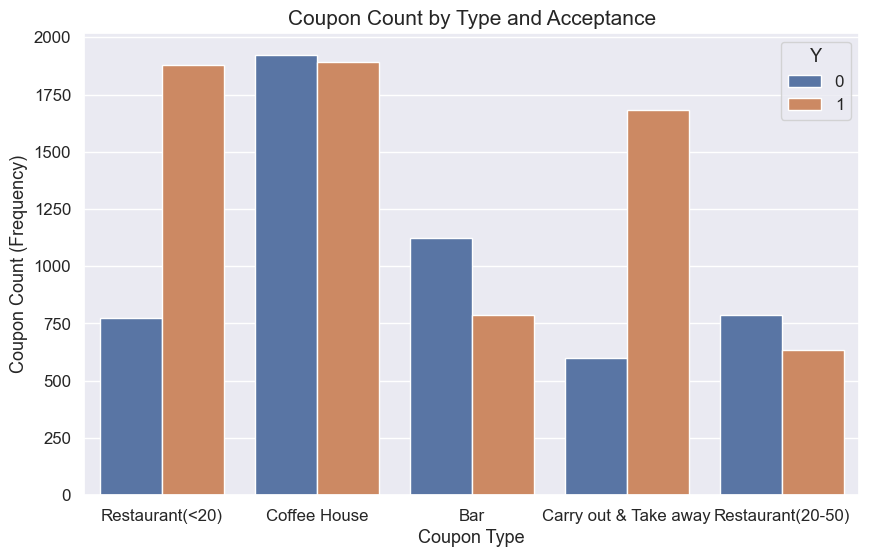

In [39]:
# Countplot showing # of observations per coupon type and whether it was accepted (Y=1) or not (Y=0)
plt.figure(figsize=(10,6))
sns.set_theme(
    font_scale=1.1
    # , palette='viridis'
)
sns.countplot(
    data
    , x='coupon'
    , hue='Y'
    , dodge=True
)
plt.title('Coupon Count by Type and Acceptance', fontsize=15)
plt.xlabel('Coupon Type', fontsize=13)
plt.ylabel('Coupon Count (Frequency)', fontsize=13)

Text(0, 0.5, 'Acceptance Rate')

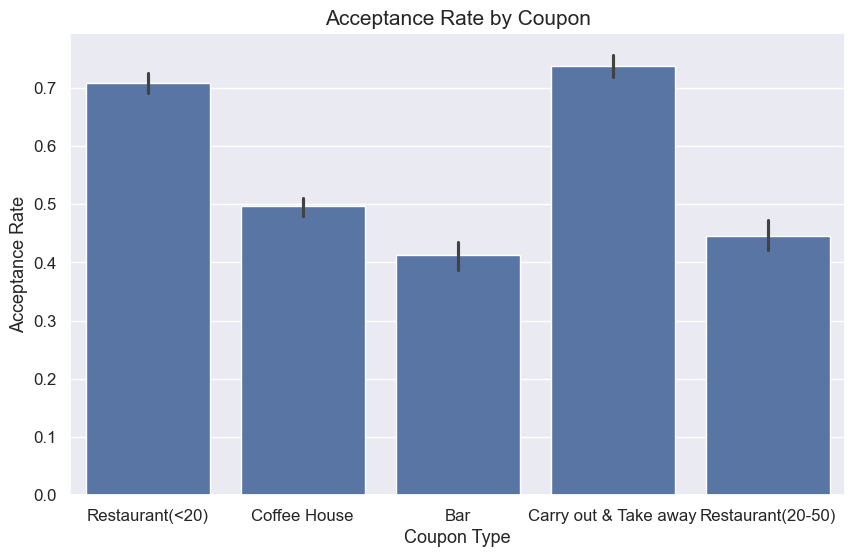

In [83]:
# barplot showing mean of Y by coupon i.e. Acceptance Rate by Coupon 
plt.figure(figsize=(10,6))
sns.set_theme(
    font_scale=1.1
    # , palette='viridis'
)
sns.barplot(
    data
    , x='coupon'
    , y='Y'
    , dodge=True
)
plt.title('Acceptance Rate by Coupon', fontsize=15)
plt.xlabel('Coupon Type', fontsize=13)
plt.ylabel('Acceptance Rate', fontsize=13)

6. Use a histogram to visualize the temperature column.

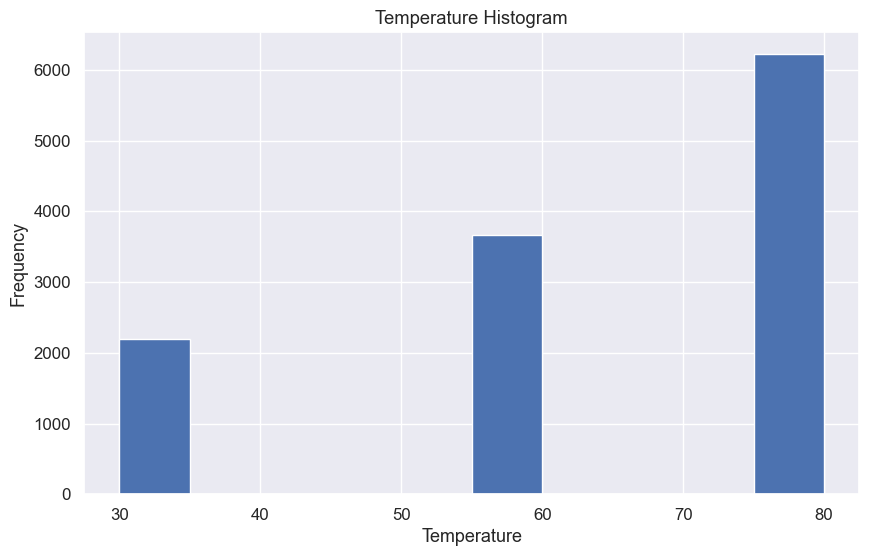

In [41]:
# histogram showing # of observations (frequency) by temperature 
plt.figure(figsize=(10,6))
plt.hist(data.temperature)
plt.title('Temperature Histogram')
plt.xlabel('Temperature', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
# plt.grid()
plt.show()

Text(0, 0.5, 'Coupon Count (Frequency)')

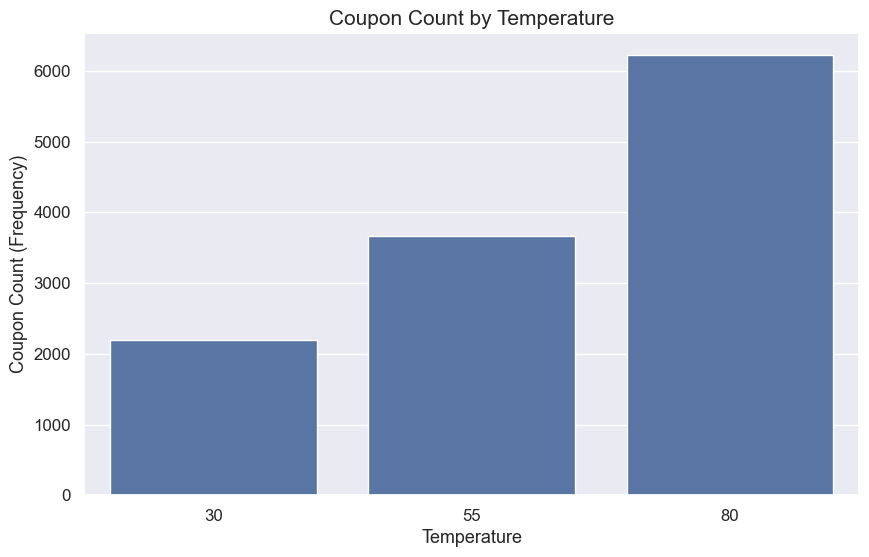

In [42]:
# Countplot aka histogram showing # of observations by temperature 
plt.figure(figsize=(10,6))
sns.set_theme(
    font_scale=1.1
    # , palette='viridis'
)
sns.countplot(
    data
    , x='temperature'
    , dodge=True
)
plt.title('Coupon Count by Temperature', fontsize=15)
plt.xlabel('Temperature', fontsize=13)
plt.ylabel('Coupon Count (Frequency)', fontsize=13)

Text(0, 0.5, 'Coupon Count (Frequency)')

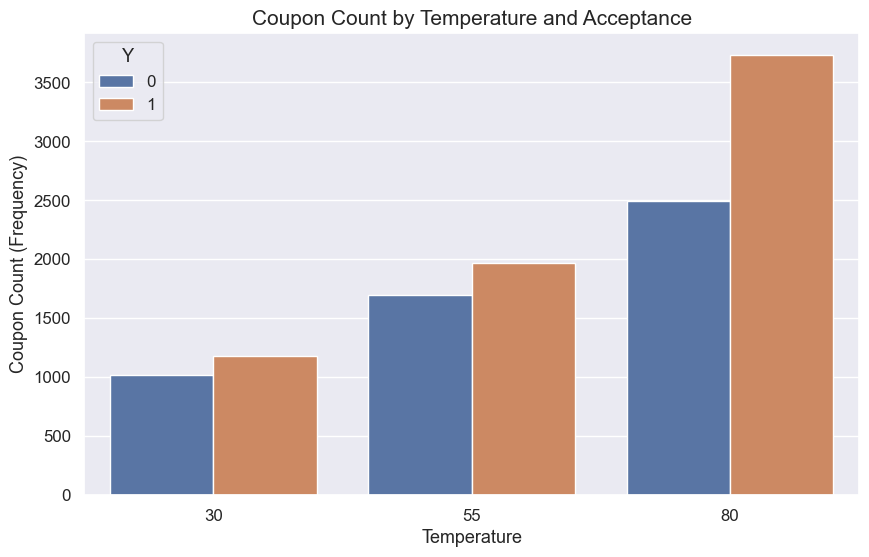

In [43]:
# Countplot showing # of observations by temperature and whether it was accepted (Y=1) or not (Y=0)
plt.figure(figsize=(10,6))
sns.set_theme(
    font_scale=1.1
    # , palette='viridis'
)
sns.countplot(
    data
    , x='temperature'
    , hue='Y'
    , dodge=True
)
plt.title('Coupon Count by Temperature and Acceptance', fontsize=15)
plt.xlabel('Temperature', fontsize=13)
plt.ylabel('Coupon Count (Frequency)', fontsize=13)

Text(0, 0.5, 'Acceptance Rate')

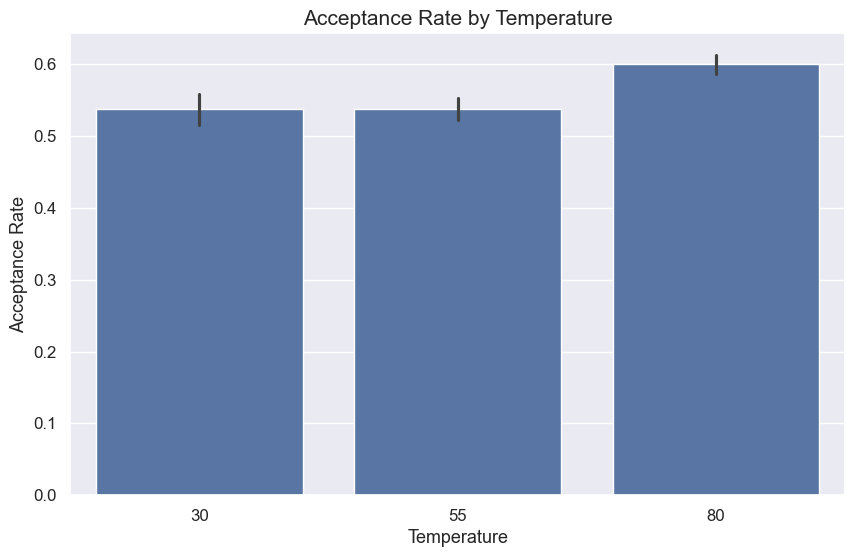

In [44]:
# barplot showing mean of Y by temperature i.e. Acceptance Rate by temperature  
plt.figure(figsize=(10,6))
sns.set_theme(
    font_scale=1.1
    # , palette='viridis'
)
sns.barplot(
    data
    , x='temperature'
    , y='Y'
    , dodge=True
)
plt.title('Acceptance Rate by Temperature', fontsize=15)
plt.xlabel('Temperature', fontsize=13)
plt.ylabel('Acceptance Rate', fontsize=13)

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [45]:
# check for all possible values for coupon in data and its value counts
data.coupon.value_counts()

coupon
Coffee House             3816
Restaurant(<20)          2653
Carry out & Take away    2280
Bar                      1913
Restaurant(20-50)        1417
Name: count, dtype: int64

In [46]:
# create new dataframe that contains just bar coupons
bar_coupon_data = data.loc[data.coupon.str.contains('Bar')]
bar_coupon_data.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
2,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21 to 25,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,1
13,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21 to 25,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21 to 25,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,1,1,0,1,1
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46 to 50,Single,0,Some college - no degree,Student,$12500 - $24999,never,4~8,1~3,1~3,never,1,0,0,0,1,0
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46 to 50,Single,0,Some college - no degree,Student,$12500 - $24999,never,4~8,1~3,1~3,never,1,0,0,1,0,0


2. What proportion of bar coupons were accepted?


*Summary of Findings:*
- *41.2% of bar coupons were accepted*

In [47]:
round(bar_coupon_data.Y.value_counts(normalize=True).loc[1]*100, 2)

# 41.2% of bar coupons were accepted

np.float64(41.19)

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


*Summary of Findings:*
- *Acceptance rate for those who went to bar 3 times or less in a month: 29.54%*
- *Acceptance rate for those who went to bar more than 3 times a month: 68.53%*

In [48]:
# Create new column called BarGroup
bar_coupon_data['BarGroup'] = bar_coupon_data.Bar.apply(lambda x: '3 or less' if x in ['1-3', 'less1', 'never'] else 'more than 3')

/var/folders/d4/jm0hqnyx3_ldxvx5_1wcgfqr0000gn/T/ipykernel_19673/2538760590.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_coupon_data['BarGroup'] = bar_coupon_data.Bar.apply(lambda x: '3 or less' if x in ['1-3', 'less1', 'never'] else 'more than 3')


In [49]:
# use value_counts with normalize option on newly created BarGroup column to get acceptance rate for those who went to bar 3 times or less
round(bar_coupon_data.loc[bar_coupon_data.BarGroup == '3 or less', 'Y'].value_counts(normalize=True)*100, 2)[1]

# Acceptance rate for those who went to bar 3 times or less: 29.53%

np.float64(29.53)

In [50]:
# use value_counts with normalize option on newly created BarGroup column to get acceptance rate for those who went to bar more than 3 times
round(bar_coupon_data.loc[bar_coupon_data.BarGroup == 'more than 3', 'Y'].value_counts(normalize=True)*100, 2)[1]

# Acceptance rate for those who went to bar 3 times or less: 68.53%

np.float64(68.53)

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


*Summary of Findings:*
- *Acceptance rate for drivers who go to a bar more than once a month and*
  - *are are over the age of 25 = 69%*
  - *are 25 years of age or below = 67%*

- *Acceptance rate for drivers who go to a bar at most once a month and*
  - *are are over the age of 25 = 27%*
  - *are 25 years of age or below = 39%*

- *Conclusion:*
  - *Acceptance Rate for drivers who go to a bar more than once a month is similar irrespective of the age.*
  - *Acceptance Rate for drivers who go to a bar more than once is more than double of those who go to a bar at most once a month.*


In [51]:
# Create new column called BarGroup2 and ageGroup
bar_coupon_data['BarGroup2'] = bar_coupon_data.Bar.apply(lambda x: 'More than 1' if x in ['1~3', '4~8', 'gt8'] else '1 or less')
bar_coupon_data['ageGroup'] = bar_coupon_data.age.apply(lambda x: '25 or below' if x in ['20 and below', '21 to 25'] else 'Over 25')

/var/folders/d4/jm0hqnyx3_ldxvx5_1wcgfqr0000gn/T/ipykernel_19673/1730416643.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_coupon_data['BarGroup2'] = bar_coupon_data.Bar.apply(lambda x: 'More than 1' if x in ['1~3', '4~8', 'gt8'] else '1 or less')
/var/folders/d4/jm0hqnyx3_ldxvx5_1wcgfqr0000gn/T/ipykernel_19673/1730416643.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_coupon_data['ageGroup'] = bar_coupon_data.age.apply(lambda x: '25 or below' if x in ['20 and below', '21 to 25'] else 'Over

In [52]:
# Calculate Acceptance Rate for different combinations of ageGroup2 and BarGroup
round(pd.crosstab(bar_coupon_data.BarGroup2, bar_coupon_data.ageGroup, dropna=False, aggfunc='mean', values=bar_coupon_data.Y)*100)

ageGroup,25 or below,Over 25
BarGroup2,,
1 or less,39.0,27.0
More than 1,67.0,69.0


In [53]:
# Overall Acceptance Rate for drivers who go to a bar at most once a month = 29.53%
round(bar_coupon_data.loc[bar_coupon_data.BarGroup2 == '1 or less', 'Y'].value_counts(normalize=True).loc[1]*100, 2)

np.float64(29.53)

In [54]:
# Overall Acceptance Rate for drivers who go to a bar more than once a month = 68.53%
round(bar_coupon_data.loc[bar_coupon_data.BarGroup2 == 'More than 1', 'Y'].value_counts(normalize=True).loc[1]*100, 2)

np.float64(68.53)

- another way to check coupon acceptance rate for each group is as below

In [55]:
# drivers who go to a bar more than once a month and are over the age of 25 = 68.98%
round((bar_coupon_data.loc[ bar_coupon_data.Bar.isin(['1~3', '4~8', 'gt8']) & ~bar_coupon_data.age.isin(['20 and below', '21 to 25'])]).Y.value_counts(normalize=True).loc[1]*100, 2)


np.float64(68.98)

In [56]:
# drivers who go to a bar more than once a month and are 25 years of age or below = 67.46%
round((bar_coupon_data.loc[ bar_coupon_data.Bar.isin(['1~3', '4~8', 'gt8']) & bar_coupon_data.age.isin(['20 and below', '21 to 25'])]).Y.value_counts(normalize=True).loc[1]*100, 2)


np.float64(67.46)

In [57]:
# drivers who go to a bar at most once a month once a month and are over the age of 25 = 26.74%
round((bar_coupon_data.loc[ ~bar_coupon_data.Bar.isin(['1~3', '4~8', 'gt8']) & ~bar_coupon_data.age.isin(['20 and below', '21 to 25'])]).Y.value_counts(normalize=True).loc[1]*100, 2)


np.float64(26.74)

In [58]:
# drivers who go to a bar at most once a month once a month and are 25 years of age or below = 38.83%
round((bar_coupon_data.loc[ ~bar_coupon_data.Bar.isin(['1~3', '4~8', 'gt8']) & bar_coupon_data.age.isin(['20 and below', '21 to 25'])]).Y.value_counts(normalize=True).loc[1]*100, 2)


np.float64(38.83)

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


*Summary of findings*
- *Acceptance Rate for drivers who go to a bar more than once a month + do not have kids as passengers + occupation is not Farming Fishing & Forestry = 71%*
- *Acceptance Rate for drivers who go to a bar more than once a month + have kids as passengers + occupation is not Farming Fishing & Forestry = 38%*
- *Acceptance Rate for drivers who go to a bar at most once a month + do not have kids as passengers + occupation is not Farming Fishing & Forestry = 31%*
- *Acceptance Rate for drivers who go to a bar at most once a month + have kids as passengers + occupation is not Farming Fishing & Forestry = 15%*

- *Note that there are only 9 drivers with occupation = Farming Fishing & Forestry.  We do not have sufficient data to make any inferences for drivers with occupation Farming Fishing & Forestry.*



In [59]:
# Create new columns called passengerIsKid and occupationGroup
bar_coupon_data['passengerIsKid'] = bar_coupon_data.passenger.apply(lambda x: 'Yes' if x == 'Kid(s)' else 'No')
bar_coupon_data['occupationGroup'] = bar_coupon_data.occupation.apply(lambda x: 'Farming Fishing & Forestry' if x == 'Farming Fishing & Forestry' else 'Other')

/var/folders/d4/jm0hqnyx3_ldxvx5_1wcgfqr0000gn/T/ipykernel_19673/1247562419.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_coupon_data['passengerIsKid'] = bar_coupon_data.passenger.apply(lambda x: 'Yes' if x == 'Kid(s)' else 'No')
/var/folders/d4/jm0hqnyx3_ldxvx5_1wcgfqr0000gn/T/ipykernel_19673/1247562419.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_coupon_data['occupationGroup'] = bar_coupon_data.occupation.apply(lambda x: 'Farming Fishing & Forestry' if x == 'Farming Fishing & Forestry

In [60]:
# Calculate Acceptance Rate for different combinations of BarGroup2, passengerIsKid and occupationGroup
round(pd.crosstab(index=[bar_coupon_data.BarGroup2, bar_coupon_data.passengerIsKid], columns=bar_coupon_data.occupationGroup, aggfunc='mean', values=bar_coupon_data.Y)*100)

occupationGroup             Farming Fishing & Forestry  Other
BarGroup2   passengerIsKid                                   
1 or less   No                                    50.0   31.0
            Yes                                   33.0   15.0
More than 1 No                                     NaN   71.0
            Yes                                    NaN   38.0

In [61]:
# check what % of rows fall under each combination of BarGroup2, passengerIsKid and occupationGroup
round(pd.crosstab(index=[bar_coupon_data.BarGroup2, bar_coupon_data.passengerIsKid], columns=bar_coupon_data.occupationGroup, normalize=True)*100, 2)

occupationGroup             Farming Fishing & Forestry  Other
BarGroup2   passengerIsKid                                   
1 or less   No                                    0.31  61.84
            Yes                                   0.16   7.79
More than 1 No                                    0.00  27.71
            Yes                                   0.00   2.20

In [62]:
# confirm number of rows for each value in occupationGroup
bar_coupon_data.occupationGroup.value_counts()

occupationGroup
Other                         1904
Farming Fishing & Forestry       9
Name: count, dtype: int64

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



*Summary of findings:* 
- *Acceptance Rate for Group 1: go to bars more than once a month, had passengers that were not a kid, and were not widowed = 70.94$*
- *Acceptance Rate for Group 2: go to bars more than once a month and are under the age of 30 = 71.95%*
- *Acceptance Rate for Group 3: go to cheap restaurants more than 4 times a month and income is less than 50K = 45.65%*
- *Acceptance Rate for all groups combined = 64.15%*

In [63]:
# Acceptance Rate for Group 1: go to bars more than once a month, had passengers that were not a kid, and were not widowed = 70.94$
group_1 = bar_coupon_data.loc[ (bar_coupon_data.BarGroup2 == 'More than 1') & (bar_coupon_data.passengerIsKid == 'No') & ~(bar_coupon_data.maritalStatus == 'Widowed'), 'Y' ]
round(group_1.value_counts(normalize=True)*100, 2)[1]


np.float64(70.94)

In [64]:
# Acceptance Rate for Group 2: go to bars more than once a month and are under the age of 30 = 71.95%
group_2 = bar_coupon_data.loc[ (bar_coupon_data.BarGroup2 == 'More than 1') & (bar_coupon_data.age.isin(['20 and below', '21 to 25', '26 to 30'])), 'Y' ]
round(group_2.value_counts(normalize=True)*100, 2)[1]


np.float64(71.95)

In [65]:
# Acceptance Rate for Group 3: go to cheap restaurants more than 4 times a month and income is less than 50K = 45.65%
group_3 = bar_coupon_data.loc[ (bar_coupon_data.RestaurantLessThan20.isin(['4~8', 'gt8'])) & (bar_coupon_data.income.isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999'])), 'Y' ]
round(group_3.value_counts(normalize=True)*100, 2)[1]


np.float64(45.65)

In [66]:
# Number of rows for each value of Y across all 3 groups 
all_groups = pd.DataFrame(group_1.value_counts() + group_2.value_counts() + group_3.value_counts())
all_groups

,count
Y,
0,427
1,764


In [67]:
# Acceptance Rate for all groups combined = 64.15%
all_groups_acceptance_rate = round(all_groups.loc[1]/(all_groups['count'].sum())*100, 2)
all_groups_acceptance_rate

count    64.15
Name: 1, dtype: float64

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

*Summary of Findings:*
- *Based on the above observations, drivers who go to a bar more than once a month and do not have kids as passengers are most likely to accept a coupon*

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

<b>TOPIC: Investigate coupon with highest acceptance rate to understand which features/factors are crucial for drivers to accept coupons</b>

In [68]:
# Crosstab of Coupon Type and Coupon Acceptance (Y)
coupon_Y = pd.crosstab(data.coupon, data.Y)
coupon_Y

Y,0,1
coupon,,
Bar,1125,788
Carry out & Take away,598,1682
Coffee House,1922,1894
Restaurant(20-50),785,632
Restaurant(<20),772,1881


In [69]:
# Calculate Acceptance Rate for each coupon type.  Note how this is exactly what was observed in the bar plot that we created previously
round(coupon_Y[1]/(coupon_Y[0]+coupon_Y[1])*100, 2).sort_values(ascending=False)

coupon
Carry out & Take away    73.77
Restaurant(<20)          70.90
Coffee House             49.63
Restaurant(20-50)        44.60
Bar                      41.19
dtype: float64

*Carry out & Take away coupon has the highest acceptance rate of 73.77%.  Therefore, we will be performing further investigation for this coupon. Specifically, we will be focusing our analysis on understanding the impact of destination, whether the venue is in the same direction as destination and time to drive to venue for carry out*

In [70]:
# create a DataFrame that contains data for coupon type 'Carry out & Take away'
carry_out_data = data.loc[data.coupon == 'Carry out & Take away']
carry_out_data.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
3,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21 to 25,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,1,0,0,1,0
11,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Male,21 to 25,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,1,0,0,1,1
19,Work,Alone,Sunny,80,7AM,Carry out & Take away,2h,Male,21 to 25,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,1,0,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,46 to 50,Single,0,Some college - no degree,Student,$12500 - $24999,never,4~8,1~3,1~3,never,1,1,0,0,1,1
33,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Male,46 to 50,Single,0,Some college - no degree,Student,$12500 - $24999,never,4~8,1~3,1~3,never,1,1,0,0,1,1


In [71]:
# create a dataframe that contains only the features we are interested in for our analysis 
carry_out_data_with_select_cols = carry_out_data.loc[:, ['destination', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y']]
carry_out_data_with_select_cols

,destination,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
3,No Urgent Place,1,1,0,0,1,0
11,No Urgent Place,1,1,0,0,1,1
19,Work,1,0,0,1,0,1
25,No Urgent Place,1,1,0,0,1,1
33,No Urgent Place,1,1,0,0,1,1
...,...,...,...,...,...,...,...
12060,No Urgent Place,1,0,0,0,1,1
12067,Home,1,1,0,1,0,0
12068,Home,1,0,0,0,1,0
12074,Home,1,0,0,1,0,1


In [72]:
# descriptive statistics for our subset of data
carry_out_data_with_select_cols.describe()

,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,2280.0,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000
mean,1.0,0.635526,0.110965,0.332456,0.667544,0.737719
std,0.0,0.481388,0.314158,0.471197,0.471197,0.439971
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,1.0,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [73]:
# In the descriptive statistics above, mean for toCoupon_GEQ5min = 1 which the value for this field equals 1 for all rows.  Verify using value_counts()
carry_out_data_with_select_cols.toCoupon_GEQ5min.value_counts()

toCoupon_GEQ5min
1    2280
Name: count, dtype: int64

In [74]:
# drop column toCoupon_GEQ5min since it does not add any value to the analysis
carry_out_data_with_select_cols = carry_out_data_with_select_cols.drop('toCoupon_GEQ5min', axis=1)
carry_out_data_with_select_cols

,destination,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
3,No Urgent Place,1,0,0,1,0
11,No Urgent Place,1,0,0,1,1
19,Work,0,0,1,0,1
25,No Urgent Place,1,0,0,1,1
33,No Urgent Place,1,0,0,1,1
...,...,...,...,...,...,...
12060,No Urgent Place,0,0,0,1,1
12067,Home,1,0,1,0,0
12068,Home,0,0,0,1,0
12074,Home,0,0,1,0,1


In [75]:
# Coupon Acceptance counts by destination 
carry_out_coupon_dest_Y = pd.crosstab(carry_out_data_with_select_cols.destination, carry_out_data_with_select_cols.Y)
carry_out_coupon_dest_Y

Y,0,1
destination,,
Home,129,491
No Urgent Place,222,709
Work,247,482


In [76]:
# Acceptance Rate by destination 
round(carry_out_coupon_dest_Y[1]/(carry_out_coupon_dest_Y[0]+carry_out_coupon_dest_Y[1])*100, 2).sort_values(ascending=False)

destination
Home               79.19
No Urgent Place    76.15
Work               66.12
dtype: float64

Text(0, 0.5, 'Acceptance Rate')

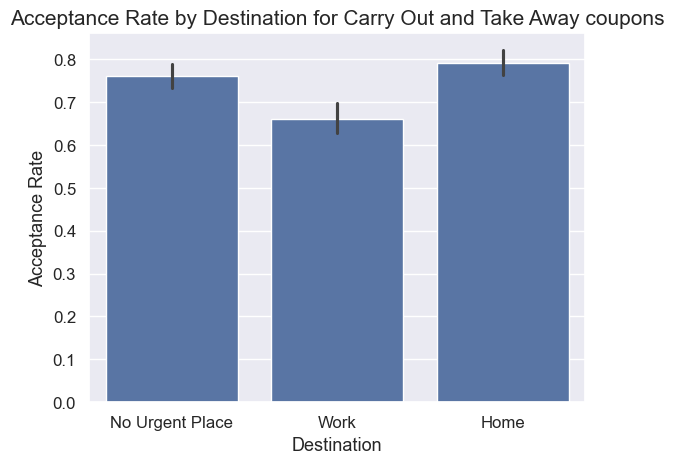

In [112]:
# barplot showing mean of Y by destination for Carry Out and Take Away coupons i.e. Acceptance Rate by destination   
# plt.figure(figsize=(8,4))
sns.set_theme(
    font_scale=1.1
    # , palette='viridis'
)
sns.barplot(
    carry_out_data_with_select_cols
    , x='destination'
    , y='Y'
    , dodge=True
)
plt.title('Acceptance Rate by Destination for Carry Out and Take Away coupons', fontsize=15)
plt.xlabel('Destination', fontsize=13)
plt.ylabel('Acceptance Rate', fontsize=13)

In [99]:
# Coupon Acceptance counts by venue direction 
carry_out_coupon_direction_Y = pd.crosstab(carry_out_data_with_select_cols.direction_same, carry_out_data_with_select_cols.Y)
carry_out_coupon_direction_Y

Y,0,1
direction_same,,
0,375,1147
1,223,535


In [100]:
# Acceptance Rate by venue direction 
round(carry_out_coupon_direction_Y[1]/(carry_out_coupon_direction_Y[0]+carry_out_coupon_direction_Y[1])*100, 2)


direction_same
0    75.36
1    70.58
dtype: float64

Text(0, 0.5, 'Acceptance Rate')

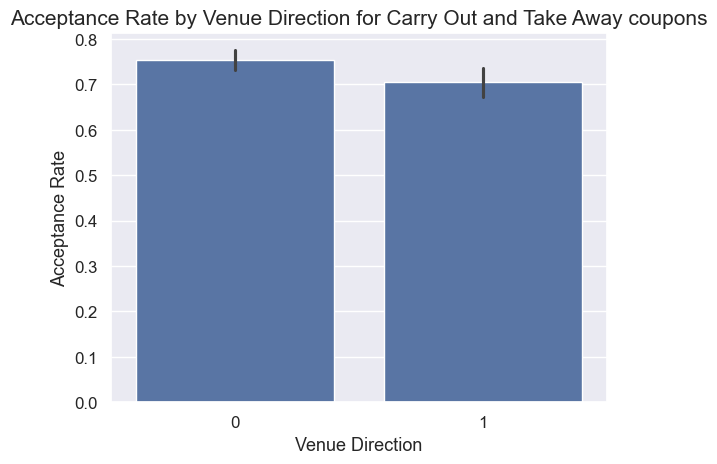

In [111]:
# barplot showing mean of Y by venue direction for Carry Out and Take Away coupons i.e. Acceptance Rate by Venue Direction   
# plt.figure(figsize=(8,4))
sns.set_theme(
    font_scale=1.1
    # , palette='viridis'
)
sns.barplot(
    carry_out_data_with_select_cols
    , x='direction_same'
    , y='Y'
    , dodge=True
)
plt.title('Acceptance Rate by Venue Direction for Carry Out and Take Away coupons', fontsize=15)
plt.xlabel('Venue Direction', fontsize=13)
plt.ylabel('Acceptance Rate', fontsize=13)

In [101]:
# Acceptance Rate by destination and venue direction 
pd.crosstab(carry_out_data_with_select_cols.destination, carry_out_data_with_select_cols.direction_same, aggfunc='mean', values=carry_out_data_with_select_cols.Y)



direction_same,0,1
destination,,
Home,0.766562,0.818482
No Urgent Place,0.761547,NaN
Work,0.711679,0.630769


Text(59.930344444444444, 0.5, 'Acceptance Rate')

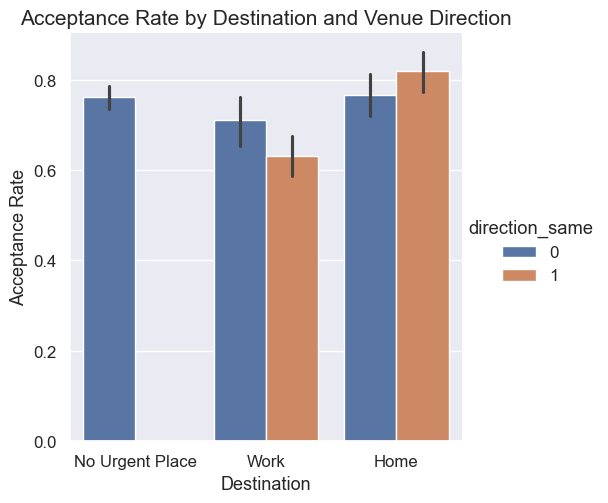

In [119]:
# grouped barplot showing mean of Y by Destination and Venue Direction i.e. Acceptance Rate by Destination and Venue Direction
# plt.figure(figsize=(8,4))
sns.set_theme(
    font_scale=1.1
    # , palette='viridis'
)
sns.catplot(
    carry_out_data_with_select_cols
    , kind='bar'
    , x='destination'
    , y='Y'
    , hue='direction_same'
    , dodge=True
)
plt.title('Acceptance Rate by Destination and Venue Direction', fontsize=15)
plt.xlabel('Destination', fontsize=13)
plt.ylabel('Acceptance Rate', fontsize=13)

In [78]:
# Coupon Acceptance counts by time to drive to venue >= 15 mins 
carry_out_coupon_GEQ15_Y = pd.crosstab(carry_out_data_with_select_cols.toCoupon_GEQ15min, carry_out_data_with_select_cols.Y)
carry_out_coupon_GEQ15_Y

Y,0,1
toCoupon_GEQ15min,,
0,205,626
1,393,1056


In [79]:
# Acceptance Rate by by time to drive to venue >= 15 mins 
round(carry_out_coupon_GEQ15_Y[1]/(carry_out_coupon_GEQ15_Y[0]+carry_out_coupon_GEQ15_Y[1])*100, 2)


toCoupon_GEQ15min
0    75.33
1    72.88
dtype: float64

Text(0, 0.5, 'Acceptance Rate')

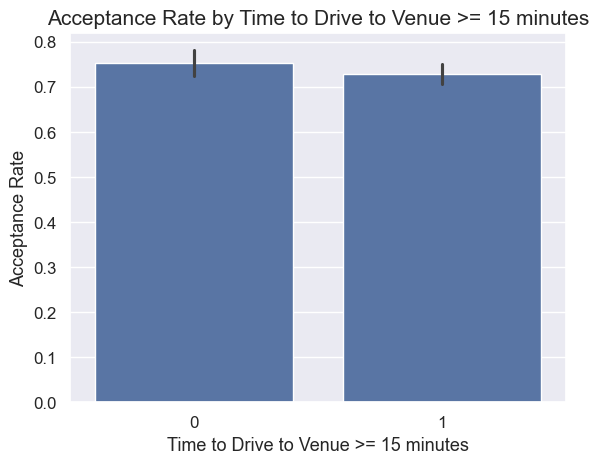

In [110]:
# barplot showing mean of Y by time to drive to venue >= 15 mins i.e. Acceptance Rate by time to drive to venue >= 15 mins
# plt.figure(figsize=(8,4))
sns.set_theme(
    font_scale=1.1
    # , palette='viridis'
)
sns.barplot(
    carry_out_data_with_select_cols
    , x='toCoupon_GEQ15min'
    , y='Y'
    , dodge=True
)
plt.title('Acceptance Rate by Time to Drive to Venue >= 15 minutes', fontsize=15)
plt.xlabel('Time to Drive to Venue >= 15 minutes', fontsize=13)
plt.ylabel('Acceptance Rate', fontsize=13)

In [102]:
# Acceptance Rate by destination and time to drive to venue >= 15 minutes
pd.crosstab(carry_out_data_with_select_cols.destination, carry_out_data_with_select_cols.toCoupon_GEQ15min, aggfunc='mean', values=carry_out_data_with_select_cols.Y)



toCoupon_GEQ15min,0,1
destination,,
Home,0.823344,0.759076
No Urgent Place,0.709459,0.771392
Work,0.710383,0.611570


Text(68.84198194444444, 0.5, 'Acceptance Rate')

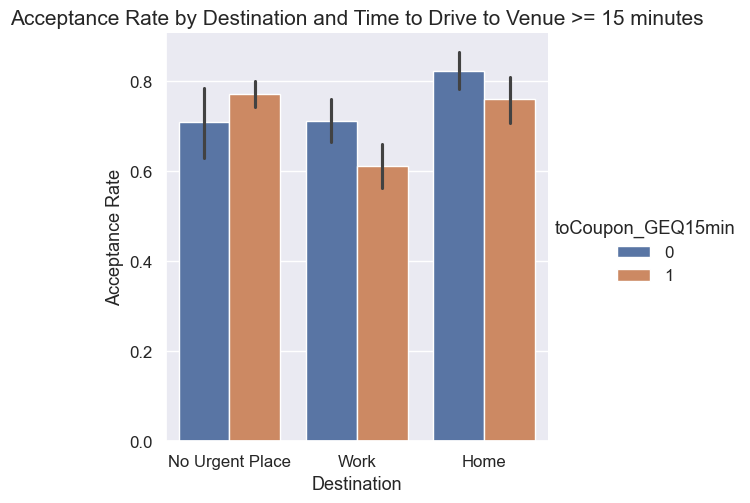

In [118]:
# grouped barplot showing mean of Y by Destination and Time to Drive to Venue >= 15 mins i.e. Acceptance Rate by Destination and Time to Drive to Venue >= 15 mins
# plt.figure(figsize=(8,4))
sns.set_theme(
    font_scale=1.1
    # , palette='viridis'
)
sns.catplot(
    carry_out_data_with_select_cols
    , kind='bar'
    , x='destination'
    , y='Y'
    , hue='toCoupon_GEQ15min'
    , dodge=True
)
plt.title('Acceptance Rate by Destination and Time to Drive to Venue >= 15 minutes', fontsize=15)
plt.xlabel('Destination', fontsize=13)
plt.ylabel('Acceptance Rate', fontsize=13)

In [80]:
# Coupon Acceptance counts by time to drive to venue >= 25 mins 
carry_out_coupon_GEQ25_Y = pd.crosstab(carry_out_data_with_select_cols.toCoupon_GEQ25min, carry_out_data_with_select_cols.Y)
carry_out_coupon_GEQ25_Y

Y,0,1
toCoupon_GEQ25min,,
0,535,1492
1,63,190


In [81]:
# Acceptance Rate by by time to drive to venue >= 25 mins 
round(carry_out_coupon_GEQ25_Y[1]/(carry_out_coupon_GEQ25_Y[0]+carry_out_coupon_GEQ25_Y[1])*100, 2)


toCoupon_GEQ25min
0    73.61
1    75.10
dtype: float64

Text(0, 0.5, 'Acceptance Rate')

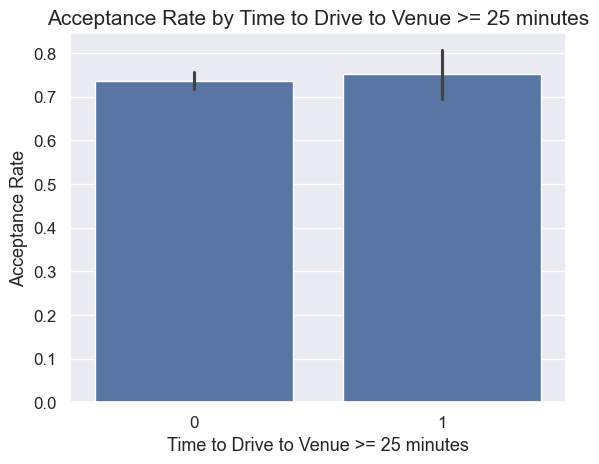

In [109]:
# barplot showing mean of Y by time to drive to venue >= 25 mins i.e. Acceptance Rate by time to drive to venue >= 25 mins
# plt.figure(figsize=(8,4))
sns.set_theme(
    font_scale=1.1
    # , palette='viridis'
)
sns.barplot(
    carry_out_data_with_select_cols
    , x='toCoupon_GEQ25min'
    , y='Y'
    , dodge=True
)
plt.title('Acceptance Rate by Time to Drive to Venue >= 25 minutes', fontsize=15)
plt.xlabel('Time to Drive to Venue >= 25 minutes', fontsize=13)
plt.ylabel('Acceptance Rate', fontsize=13)

In [103]:
# Acceptance Rate by destination and time to drive to venue >= 25 minutes
pd.crosstab(carry_out_data_with_select_cols.destination, carry_out_data_with_select_cols.toCoupon_GEQ25min, aggfunc='mean', values=carry_out_data_with_select_cols.Y)



toCoupon_GEQ25min,0,1
destination,,
Home,0.797753,0.755814
No Urgent Place,0.761547,NaN
Work,0.635231,0.748503


Text(68.84198194444444, 0.5, 'Acceptance Rate')

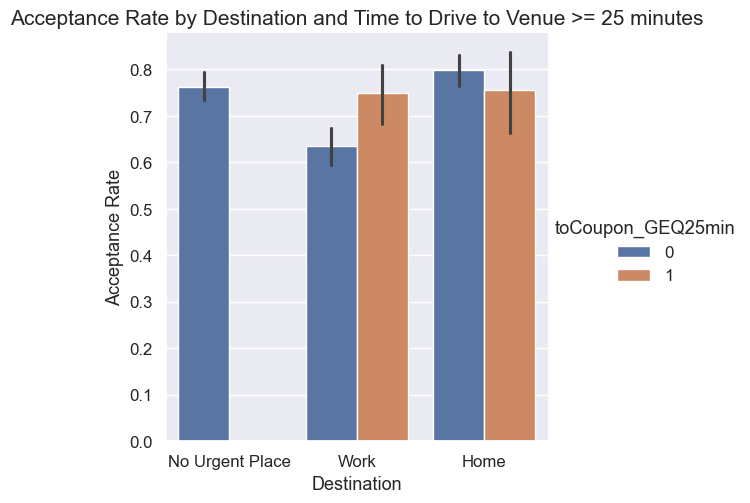

In [117]:
# grouped barplot showing mean of Y by Destination and Time to Drive to Venue >= 25 mins i.e. Acceptance Rate by Destination and Time to Drive to Venue >= 25 mins
# plt.figure(figsize=(8,4))
sns.set_theme(
    font_scale=1.1
    # , palette='viridis'
)
sns.catplot(
    carry_out_data_with_select_cols
    , kind='bar'
    , x='destination'
    , y='Y'
    , hue='toCoupon_GEQ25min'
    , dodge=True
)
plt.title('Acceptance Rate by Destination and Time to Drive to Venue >= 25 minutes', fontsize=15)
plt.xlabel('Destination', fontsize=13)
plt.ylabel('Acceptance Rate', fontsize=13)

### Summary of findings from independent investigation of Carry out & Take away coupon
- Overall Acceptance Rate: 73.77%
- Destination "Home" and "No Urgent Place" have a much higher acceptance rate compared to "Work" (at least 10% more)
- Venue Direction, Time to Drive to Venue >= 15 minutes and Time to Drive to Venue >= 25 minutes do not have a significant impact on overall coupon acceptance rate independently. 
- Analyzing the data further by Venue Direction and each of the other factors: 
  - Coupon Acceptance Rate for "No Urgent Place" as destination is 0% if: 
    - Venue Direction is the same as the Destination 
    - Time to Drive to Venue >= 25 minutes 